<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/K_FOLD_CROSS_VALIDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az 

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 10541 (delta 25), reused 12 (delta 5), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 23.11 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

#Google colab tools

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

#Instalar dependendias

In [4]:
!pip install sklearn

# Regresión Bosques Aleatorios


# Cómo importar las librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [7]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 10 - Model Selection & Boosting/Section 48 - Model Selection/Social_Network_Ads.csv')

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [8]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [9]:
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el clasificador en el Conjunto de Entrenamiento

In [12]:
from sklearn.svm import SVC

In [13]:
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

# Predicción de los resultados con el Conjunto de Testing

In [14]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[64,  4],
       [ 3, 29]])

In [24]:
(64+29)/(64+4+3+29)

0.93

# Aplicar k-fold cross validation

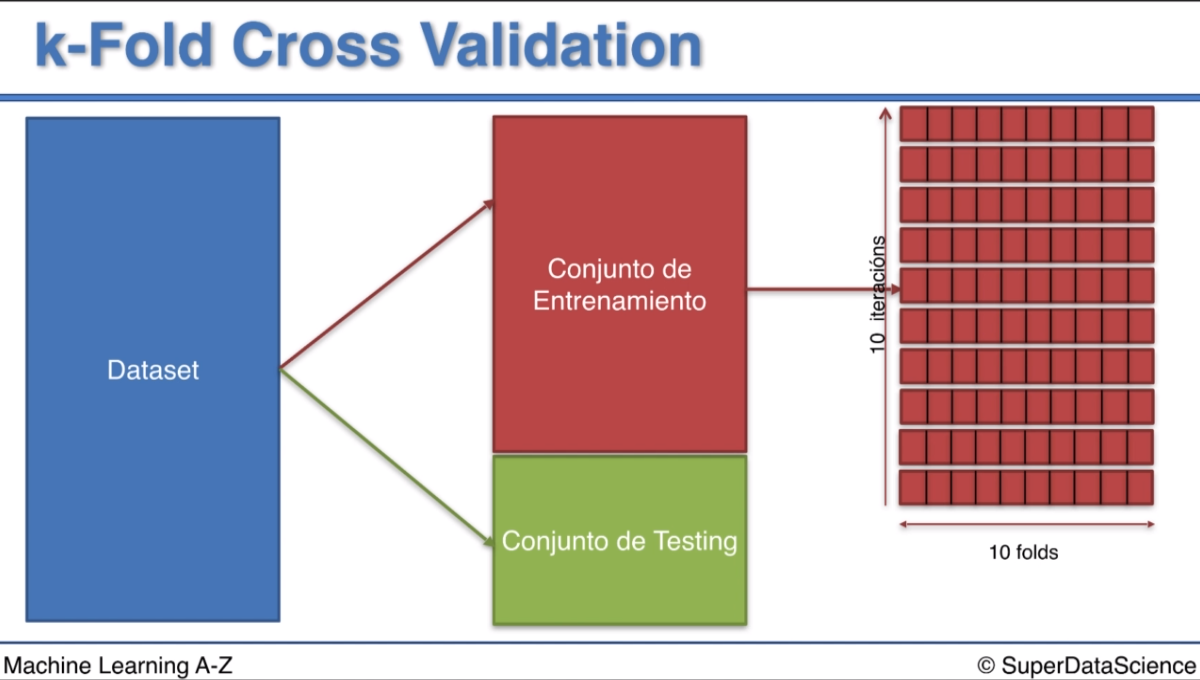

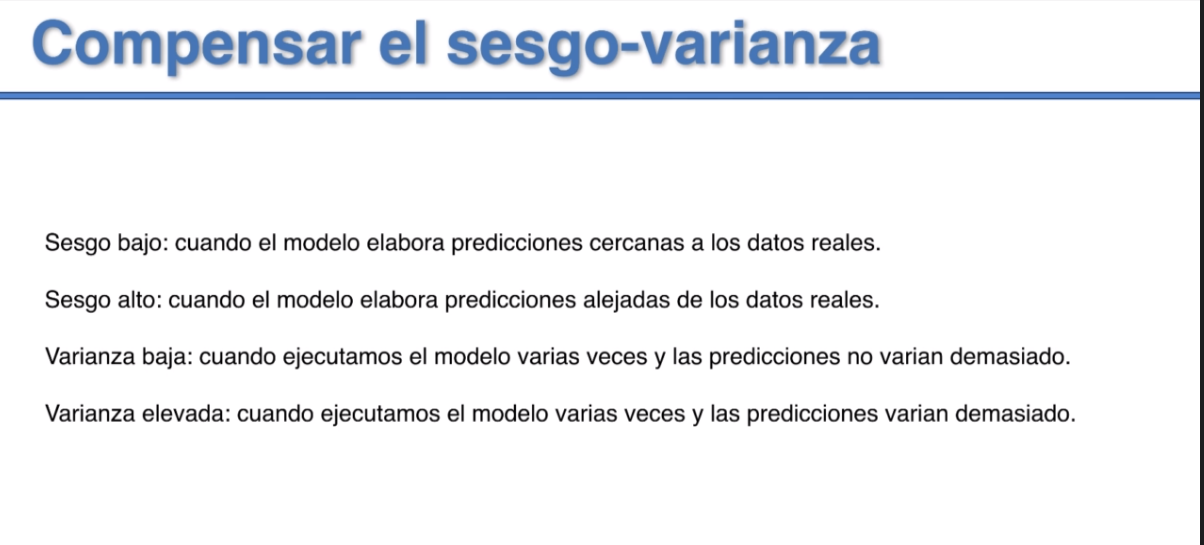

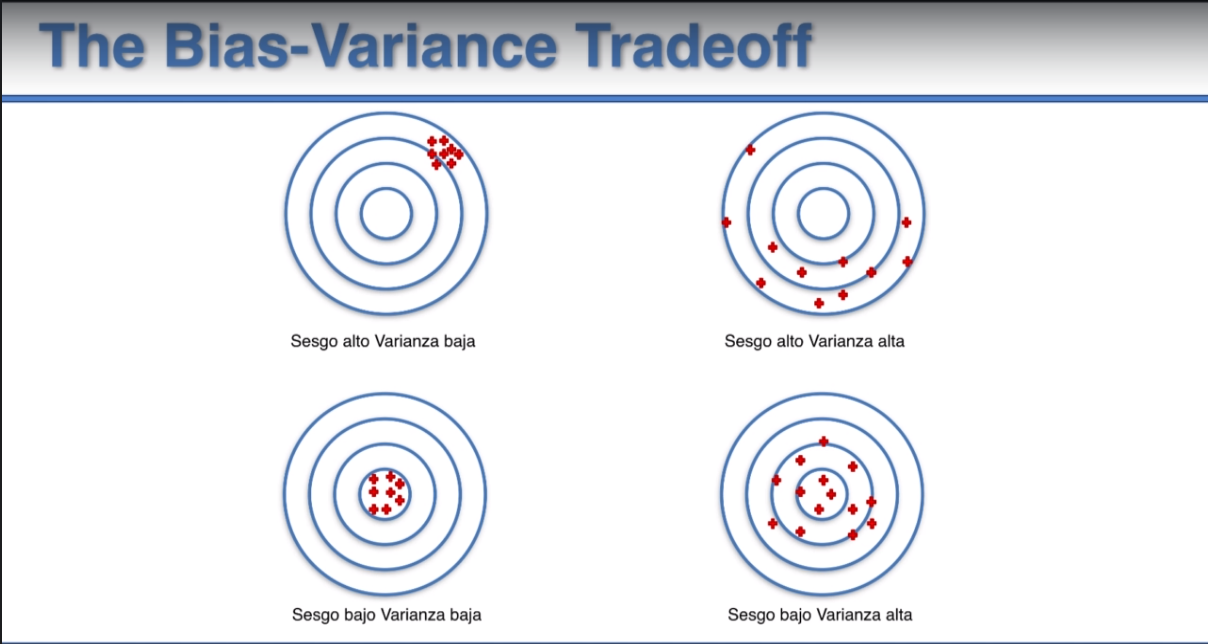

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean() # media 
accuracies.std() # desviacion estadar

0.06574360974438671

In [22]:
accuracies.mean() # segun los datos de media y  desviacióon estamos con un sesgo bajo y una varianza baja. 

0.9033333333333333

In [21]:
accuracies # aqui tenemnos las precision de todas

array([0.8       , 0.96666667, 0.8       , 0.96666667, 0.86666667,
       0.86666667, 0.9       , 0.93333333, 1.        , 0.93333333])

# Aplicar la mejora de Grid Search para otimizar el modelo y sus parámetros

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000],'kernel': ['linear']},
              {'C': [1, 10, 100, 1000],'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


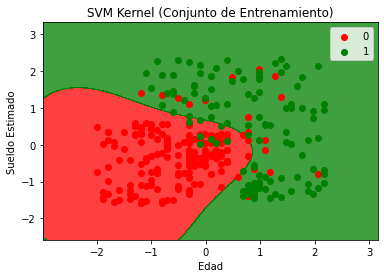

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


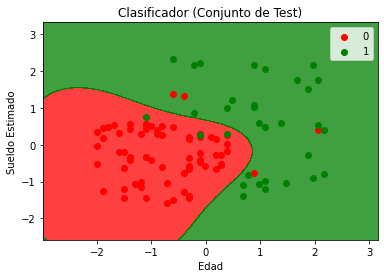

In [19]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()